In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("./ifood-restaurants-november-2020.csv", sep=",",header=0)

In [34]:
#criando e excluindo colunas no df
#df["delivery_time_100"] = df["delivery_time"] * 100
df.drop(labels=["delivery_time_100"], axis=1, inplace=True)
#primeiro argumento 'labels' eu seleciono a coluna que estou excluindo
#segundo argumento 'axis' || 0 = excluir todas as linhas que contem o labels || 1 = excluir todas as colunas com o titulo do labels
#terceiro argumento 'inplace' || true = se vai salvar no df || false/em branco = alteração pontual apenas para teste

df.head(5)

,avatar,category,delivery_fee,delivery_time,distance,name,price_range,rating,url,lat,long
0,https://static-images.ifood.com.br/image/uploa...,Lanches,9.00,80,6.20,El'moedor,CHEAP,4.30303,https://www.ifood.com.br/delivery/vitoria-de-s...,-8.11298,-35.215
1,https://static-images.ifood.com.br/image/uploa...,Doces & Bolos,6.00,35,3.03,Delicia de Brigadeiro,CHEAPEST,0.00000,https://www.ifood.com.br/delivery/moreno-pe/de...,-8.11298,-35.115
2,https://static-images.ifood.com.br/image/uploa...,Brasileira,4.00,40,1.51,Pizzaria Rappi10 - Moreno,CHEAPEST,0.00000,https://www.ifood.com.br/delivery/moreno-pe/pi...,-8.11298,-35.115
3,https://static-images.ifood.com.br/image/uploa...,Lanches,0.00,50,0.79,Tapioca Arretada,CHEAPEST,5.00000,https://www.ifood.com.br/delivery/jaboatao-dos...,-8.11298,-35.015
4,https://static-images.ifood.com.br/image/uploa...,Salgados,12.99,36,5.12,Minuto Kit Festa ( Salgados e Doces ),CHEAPEST,5.00000,https://www.ifood.com.br/delivery/jaboatao-dos...,-8.11298,-35.015


Variáveis Categóricas

In [5]:
df['category'].value_counts()


category
Lanches            89331
Brasileira         67027
Doces & Bolos      34041
Pizza              33797
Açaí               17837
                   ...  
Colombiana            39
Típica do Norte       27
Paranaense             4
Grega                  3
Churrasco Grego        1
Name: count, Length: 61, dtype: int64

Frequência de preço: 
price_range
CHEAPEST          248818
MODERATE           44977
CHEAP              43281
EXPENSIVE          15820
MOST_EXPENSIVE      8551
Name: count, dtype: int64


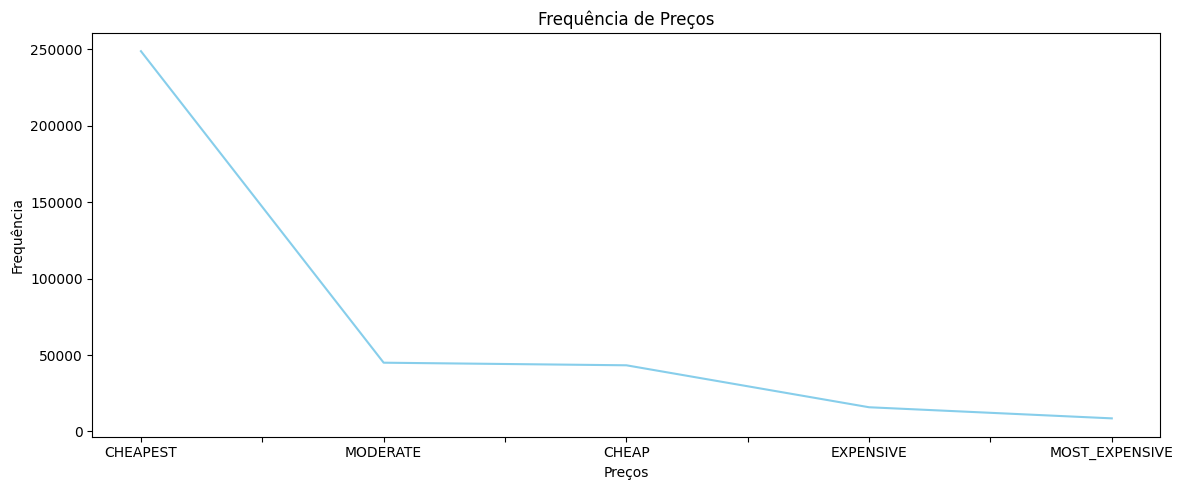

In [6]:
#Calculando frequência para dados categóricos
frequencia_price = df['price_range'].value_counts()
frequencia_category = df['category'].value_counts()

print("Frequência de preço: ")
print(frequencia_price)

#Criando gráficos de barras para as frequências
plt.figure(figsize=(12,5))

#gráfico de preços
frequencia_price.plot(kind='line', color='skyblue')
plt.title('Frequência de Preços')
plt.xlabel('Preços')
plt.ylabel('Frequência')
plt.tight_layout()



Frequência de categorias: 
category
Lanches            89331
Brasileira         67027
Doces & Bolos      34041
Pizza              33797
Açaí               17837
                   ...  
Colombiana            39
Típica do Norte       27
Paranaense             4
Grega                  3
Churrasco Grego        1
Name: count, Length: 61, dtype: int64


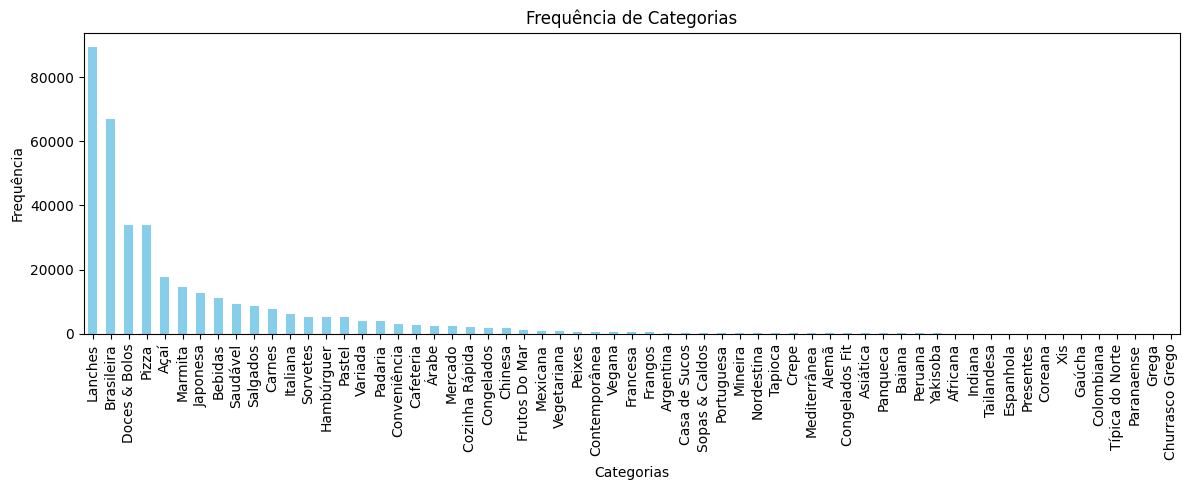

In [7]:

print("Frequência de categorias: ")
print(frequencia_category)

#Criando gráficos de barras para as categorias
plt.figure(figsize=(12,5))

#gráfico de preços
frequencia_category.plot(kind='bar', color='skyblue')
plt.title('Frequência de Categorias')
plt.xlabel('Categorias')
plt.ylabel('Frequência')

plt.tight_layout()




Variáveis Numéricas 

In [ ]:
#binarização dos dados 
bins = [0,1,2,3,4,5,6,7,8,9,10]
labels = ['00. 0-1', '01. 1-2', '02. 2-3', '03. 3-4', '04. 4-5', '05. 5-6', '06. 6-7', '07. 7-8', '08. 8-9', '09. 9-10']
#criando uma nova coluna com o nome faixa_distancia
df['faixa_distancia'] = pd.cut(df['distance'], bins=bins, labels=labels, right=False)


Frequência de Distância: 
faixa_distancia
00. 0-1     38506
01. 1-2     67906
02. 2-3     69708
03. 3-4     59286
04. 4-5     45483
05. 5-6     36729
06. 6-7     30371
07. 7-8      4480
08. 8-9      2981
09. 9-10     2220
Name: count, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '00. 0-1'),
  Text(1, 0, '01. 1-2'),
  Text(2, 0, '02. 2-3'),
  Text(3, 0, '03. 3-4'),
  Text(4, 0, '04. 4-5'),
  Text(5, 0, '05. 5-6'),
  Text(6, 0, '06. 6-7'),
  Text(7, 0, '07. 7-8'),
  Text(8, 0, '08. 8-9'),
  Text(9, 0, '09. 9-10')])

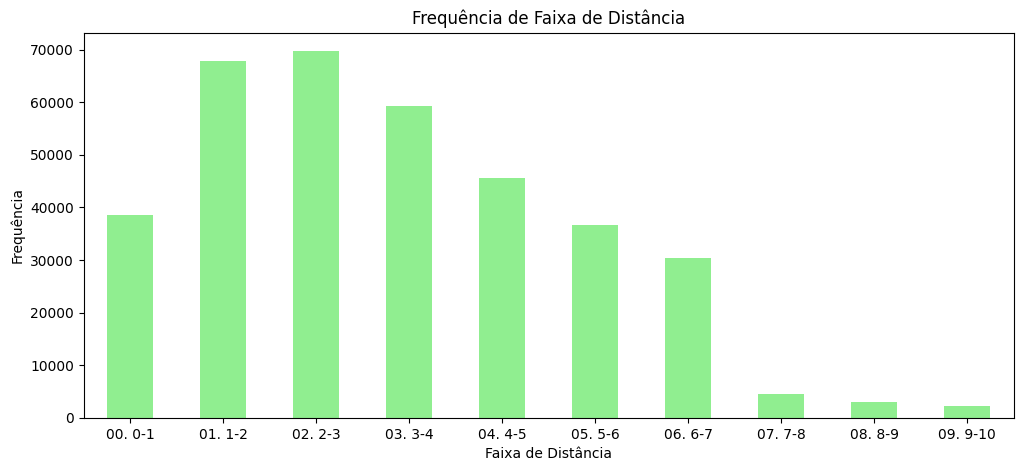

In [38]:
frequencia_distancia = df["faixa_distancia"].value_counts()
frequencia_distancia = frequencia_distancia.reindex(labels)

print("\nFrequência de Distância: ")
print(frequencia_distancia)

plt.figure(figsize=(12,5))

#criando gráfico de barras para as frequências
frequencia_distancia.plot(kind='bar', color='lightgreen')
plt.title("Frequência de Faixa de Distância")  
plt.xlabel("Faixa de Distância")
plt.ylabel("Frequência")
plt.xticks(rotation=0) #Para mantes os labels na horizontal 